# **1. Importing Libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen

# **2. Loading the Dataset**
# Load the dataset from the UCI repository and define the column names.

In [10]:
# Read the data directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']
# Load the dataset
df = pd.read_csv(url, names=column_names)

# **3. Selecting and Renaming Columns**
# Select the necessary columns and rename them for clarity.

In [11]:
# Select relevant columns (class, odor, and cap-color as our third choice)
selected_columns = ['class', 'odor', 'cap-color']
df_selected = df[selected_columns].copy()

# **4. Mapping Categorical Data**
# Convert categorical data into numeric form for scikit-learn compatibility.

In [14]:
# Create mapping dictionaries for each column
class_mapping = {'e': 0, 'p': 1}  # e = edible, p = poisonous
odor_mapping = {
    'a': 0,  # almond
    'l': 1,  # anise
    'c': 2,  # creosote
    'y': 3,  # fishy
    'f': 4,  # foul
    'm': 5,  # musty
    'n': 6,  # none
    'p': 7,  # pungent
    's': 8   # spicy
}
cap_color_mapping = {
    'n': 0,  # brown
    'b': 1,  # buff
    'c': 2,  # cinnamon
    'g': 3,  # gray
    'r': 4,  # green
    'p': 5,  # pink
    'u': 6,  # purple
    'e': 7,  # red
    'w': 8,  # white
    'y': 9   # yellow
}

# Apply mappings
df_selected['class_numeric'] = df_selected['class'].map(class_mapping)
df_selected['odor_numeric'] = df_selected['odor'].map(odor_mapping)
df_selected['cap_color_numeric'] = df_selected['cap-color'].map(cap_color_mapping)

# **5. Exploratory Data Analysis**
# Visualize the distributions and relationships between features.

In [15]:
# Create visualization functions
def plot_distributions(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Distribution of classes
    sns.countplot(data=df, x='class', ax=axes[0])
    axes[0].set_title('Distribution of Mushroom Classes')
    axes[0].set_xlabel('Class (0=Edible, 1=Poisonous)')
    
    # Distribution of odors
    sns.countplot(data=df, x='odor', ax=axes[1])
    axes[1].set_title('Distribution of Odors')
    axes[1].set_xlabel('Odor Types')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Distribution of cap colors
    sns.countplot(data=df, x='cap-color', ax=axes[2])
    axes[2].set_title('Distribution of Cap Colors')
    axes[2].set_xlabel('Cap Colors')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# **6. Summary Statistics and Preliminary Findings**
# Display a summary of the data and note any initial observations.

In [7]:
# Show summary statistics
print(df.describe())

             Class         Odor     CapColor
count  8124.000000  8124.000000  8124.000000
mean      0.482029     4.144756     4.504677
std       0.499708     2.103729     2.545821
min       0.000000     0.000000     0.000000
25%       0.000000     2.000000     3.000000
50%       0.000000     5.000000     4.000000
75%       1.000000     5.000000     8.000000
max       1.000000     8.000000     9.000000


In [20]:
def plot_relationships(df):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Relationship between class and odor
    sns.boxplot(data=df, x='class', y='odor_numeric', ax=axes[0])
    axes[0].set_title('Relationship between Class and Odor')
    axes[0].set_xlabel('Class (0=Edible, 1=Poisonous)')
    axes[0].set_ylabel('Odor Type')
    
    # Relationship between class and cap color
    sns.boxplot(data=df, x='class', y='cap_color_numeric', ax=axes[1])
    axes[1].set_title('Relationship between Class and Cap Color')
    axes[1].set_xlabel('Class (0=Edible, 1=Poisonous)')
    axes[1].set_ylabel('Cap Color')
    
    plt.tight_layout()
    plt.show()


Basic Statistics:
       class_numeric  odor_numeric  cap_color_numeric
count    8124.000000   8124.000000        8124.000000
mean        0.482029      4.788282           4.323486
std         0.499708      1.983678           3.444391
min         0.000000      0.000000           0.000000
25%         0.000000      4.000000           0.000000
50%         0.000000      6.000000           3.000000
75%         1.000000      6.000000           8.000000
max         1.000000      8.000000           9.000000

Correlation Matrix:
                   class_numeric  odor_numeric  cap_color_numeric
class_numeric           1.000000     -0.086800           0.058452
odor_numeric           -0.086800      1.000000          -0.318907
cap_color_numeric       0.058452     -0.318907           1.000000


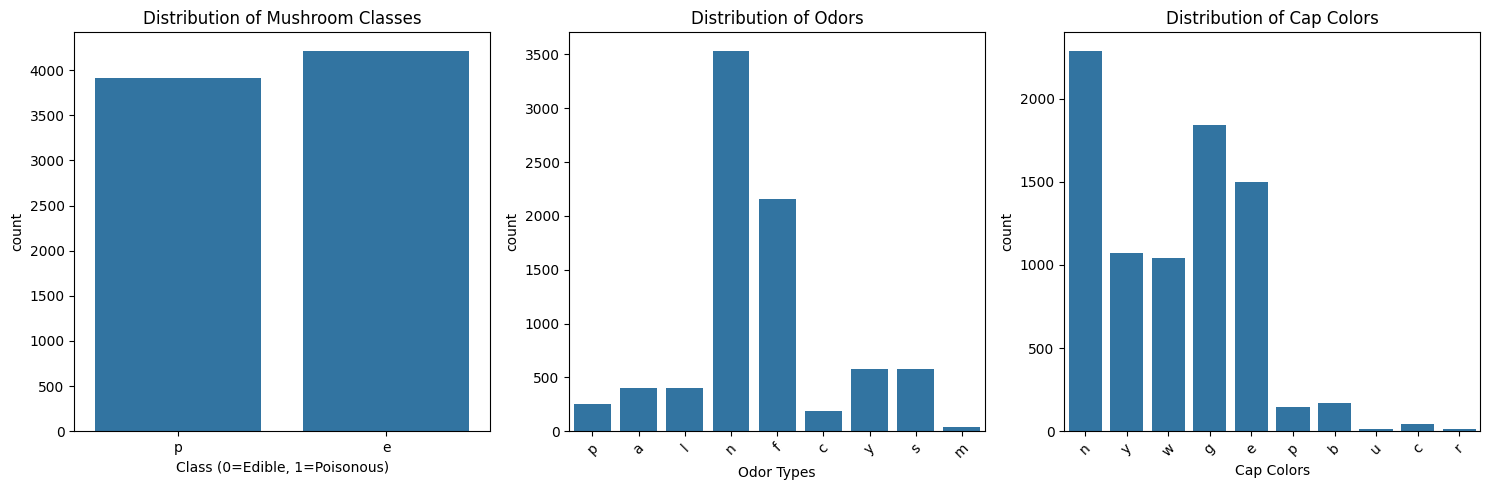

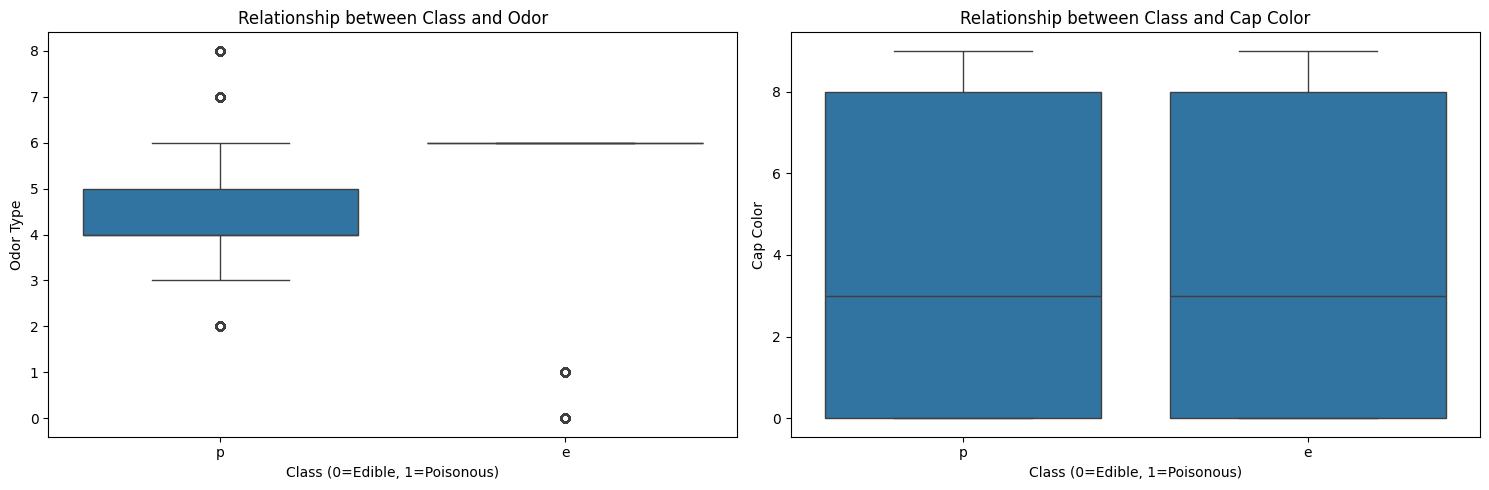

In [18]:
# Generate basic statistics
print("\nBasic Statistics:")
print(df_selected.describe())

# Generate correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df_selected[['class_numeric', 'odor_numeric', 'cap_color_numeric']].corr()
print(correlation_matrix)

# Plot distributions
plot_distributions(df_selected)

# Plot relationships
plot_relationships(df_selected)

In [19]:
# Analyze relationships
def analyze_relationships(df):
    # Calculate the percentage of poisonous mushrooms for each odor
    odor_analysis = df.groupby('odor')['class'].value_counts(normalize=True).unstack()
    print("\nPercentage of poisonous mushrooms by odor:")
    print(odor_analysis['p'].sort_values(ascending=False))
    
    # Calculate the percentage of poisonous mushrooms for each cap color
    cap_color_analysis = df.groupby('cap-color')['class'].value_counts(normalize=True).unstack()
    print("\nPercentage of poisonous mushrooms by cap color:")
    print(cap_color_analysis['p'].sort_values(ascending=False))

analyze_relationships(df_selected)


Percentage of poisonous mushrooms by odor:
odor
c    1.000000
f    1.000000
m    1.000000
p    1.000000
s    1.000000
y    1.000000
n    0.034014
a         NaN
l         NaN
Name: p, dtype: float64

Percentage of poisonous mushrooms by cap color:
cap-color
b    0.714286
y    0.626866
p    0.611111
e    0.584000
n    0.446585
g    0.439130
w    0.307692
c    0.272727
r         NaN
u         NaN
Name: p, dtype: float64
